# WK8 Data Visualization <hr style="border:2.5px solid #126782"></hr>

**Name**: Ralph Michael A. De La Torre<br>**Section**: BS CpE 2A

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"raw\chip-dataset-cleaned.csv",
                delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [4]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# N Chips Manufactured

In [5]:
df_w = df.copy()

In [6]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [7]:
type(chip_count)

pandas.core.series.Series

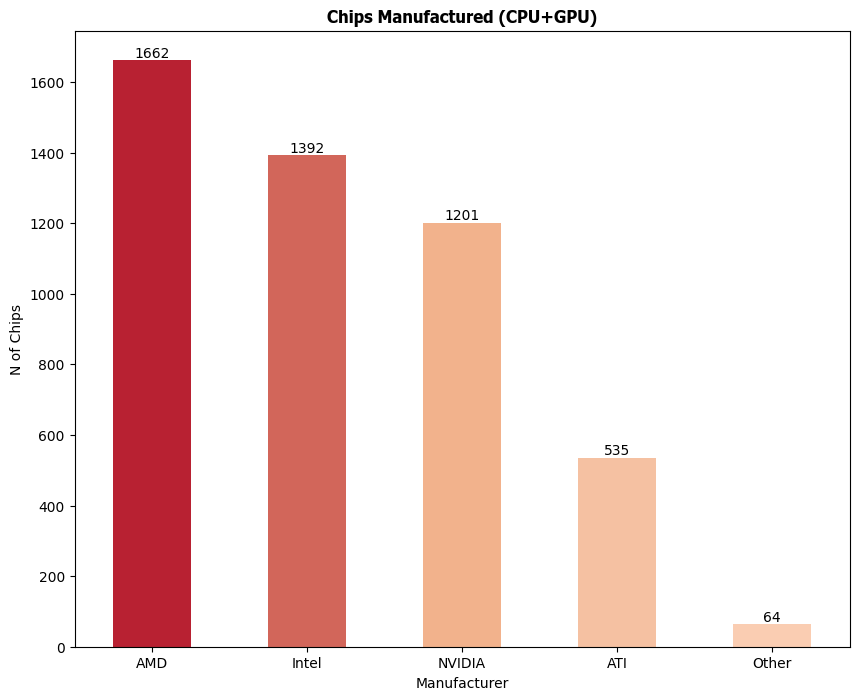

In [8]:
chart = chip_count.plot(kind='bar',
                        color = ['#B82132','#D2665A','#F2B28C','#f5c1a2','#facdb2'],
                        figsize=(10,8))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Tahoma',
          fontsize=12,
          fontweight='bold')
plt.xlabel('Manufacturer')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N of Chips')
plt.show()

# N CPU Manufactured

In [9]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [10]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

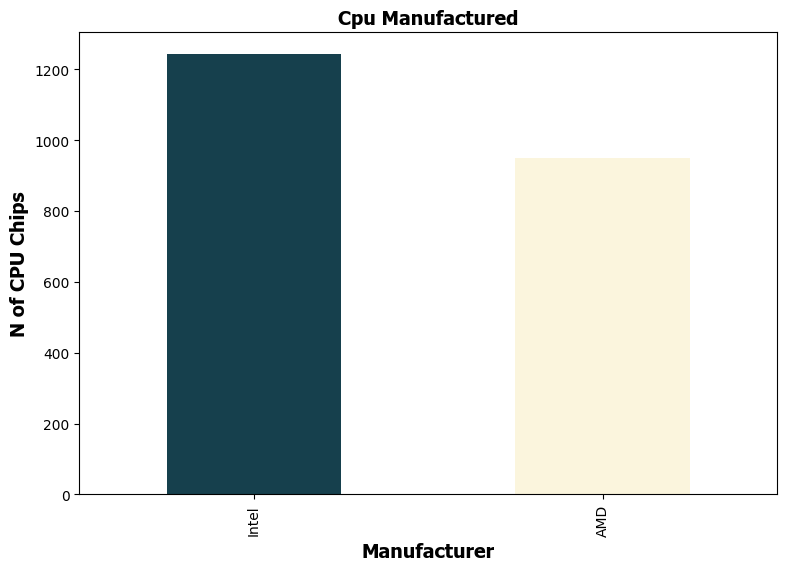

In [11]:
chart = cpu_count.plot(kind='bar',
                       figsize=(9,6),
                       color=['#16404D','#FBF5DD'])
plt.title('Cpu Manufactured',
          fontfamily = 'Tahoma',
          fontsize=14,
          fontweight='bold')
plt.ylabel('N of CPU Chips',
          fontfamily = 'Tahoma',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Manufacturer',
          fontfamily = 'Tahoma',
          fontsize=14,
          fontweight='bold')
plt.show()

# Lowest Thermal Design Power (TDP)

In [12]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [13]:
type(df_tdp)

pandas.core.frame.DataFrame

In [14]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [15]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0


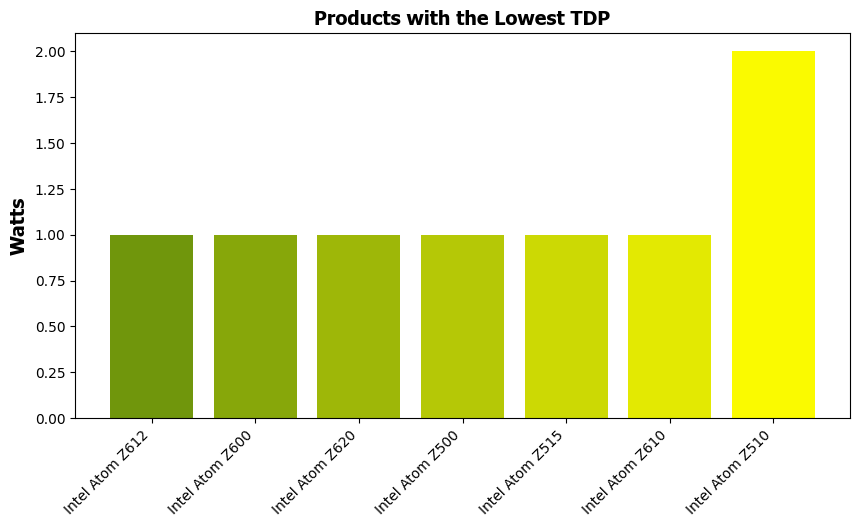

In [16]:
color = ['#70960c','#87a70a','#9eb708','#b5c806','#ccd904','#e3e902','#fafa00']
chart = plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp['TDP'], color=color)
plt.title('Products with the Lowest TDP',
          fontfamily = 'Tahoma',
          fontsize=14,
          fontweight='bold')
plt.ylabel('Watts',
          fontfamily = 'Tahoma',
          fontsize=14,
          fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

# GPU Process Size Trend


CPU + GPU Process Size Trend over the Years

In [17]:
plt.figure(figsize=(10,7))
plt.plot(df_cps['Year'],df_cps['Process_Size'], color = 'orange', label = 'CPU Process Size')
plt.plot(df_ps['Year'],df_ps['Process_Size'], color = 'teal',label = 'GPU Process Size')
plt.title('CPU + GPU Process Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Transistor Size(nm)' , fontfamily = 'Georgia', fontsize = 14)
plt.legend(fontsize=12, loc='upper left')

NameError: name 'df_cps' is not defined

<Figure size 1000x700 with 0 Axes>

# Die Size Trend

CPU + GPU Die Size Trend over the Years

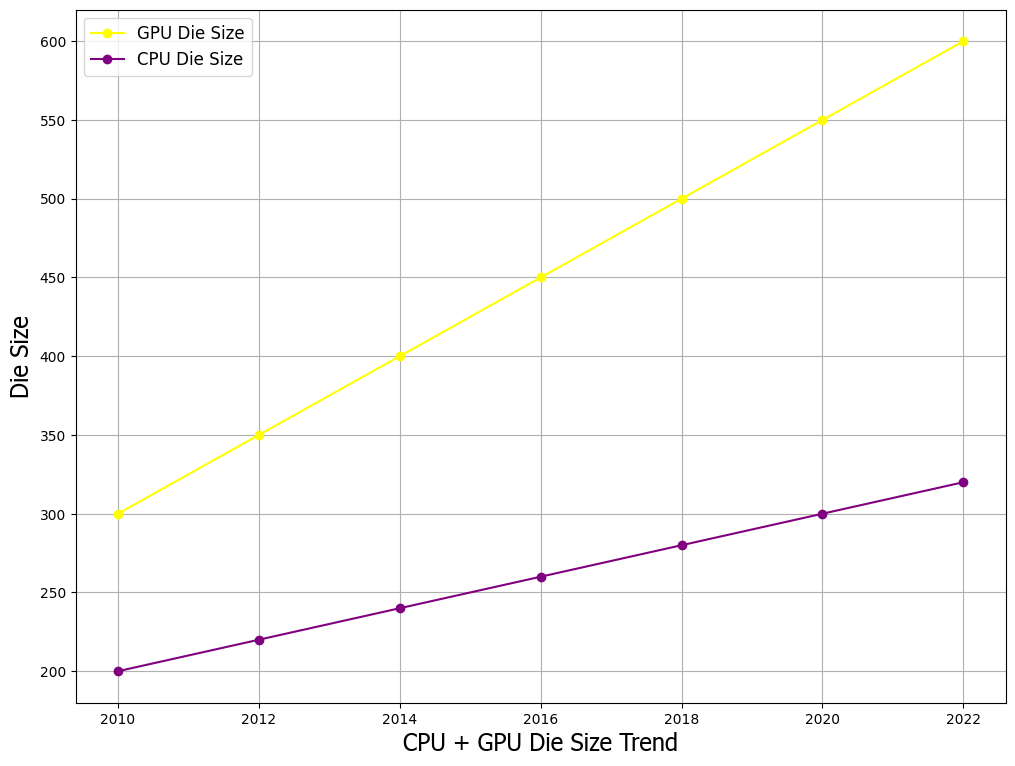

In [122]:
plt.figure(figsize=(12,9))
plt.plot(years, gpu_die_sizes, marker='o', label='GPU Die Size', color='yellow')
plt.plot(years, cpu_die_sizes, marker='o', label='CPU Die Size',color='purple')
plt.grid()
plt.xlabel('CPU + GPU Die Size Trend',  fontfamily = 'Tahoma', fontsize = 17)
plt.ylabel('Die Size' , fontfamily = 'Tahoma', fontsize = 17)
plt.legend(fontsize=12, loc='upper left')

# Transistors

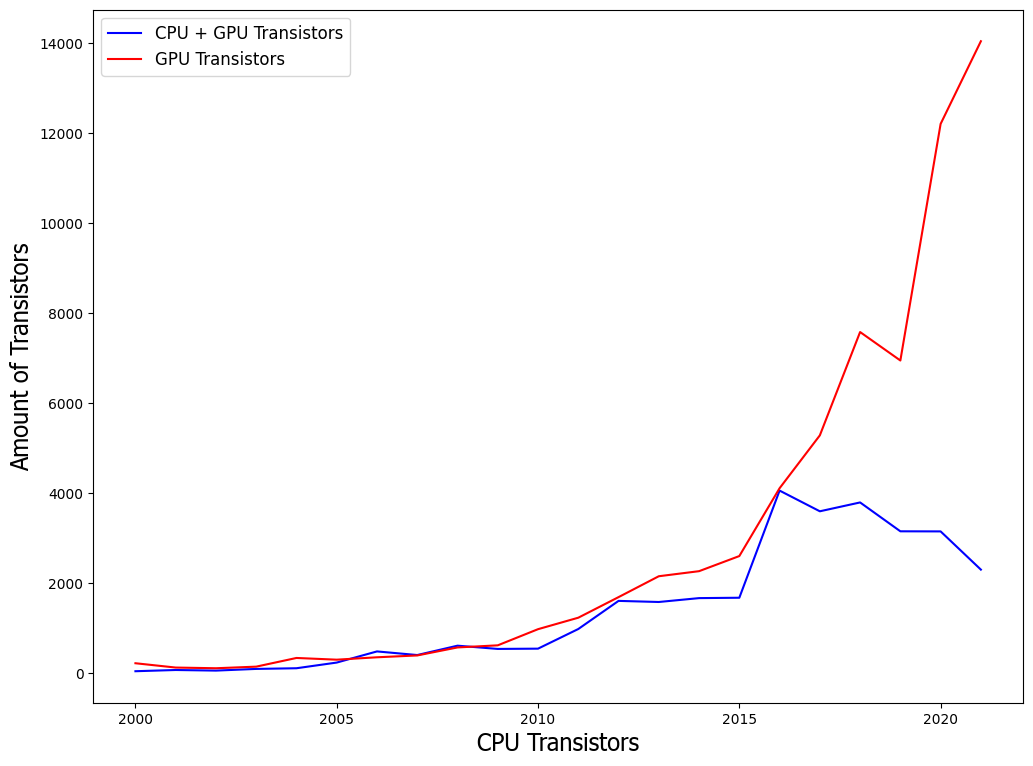

In [130]:
plt.figure(figsize=(12,9))
plt.plot(df_cts['Year'],df_cts['Transistors'], color = 'blue', label = 'CPU + GPU Transistors')
plt.plot(df_ts['Year'],df_ts['Transistors'], color = 'red', label = 'GPU Transistors')
plt.xlabel('CPU Transistors',  fontfamily = 'Tahoma', fontsize = 17)
plt.ylabel('Amount of Transistors' , fontfamily = 'Tahoma', fontsize = 17)
plt.legend(fontsize=12, loc='upper left')

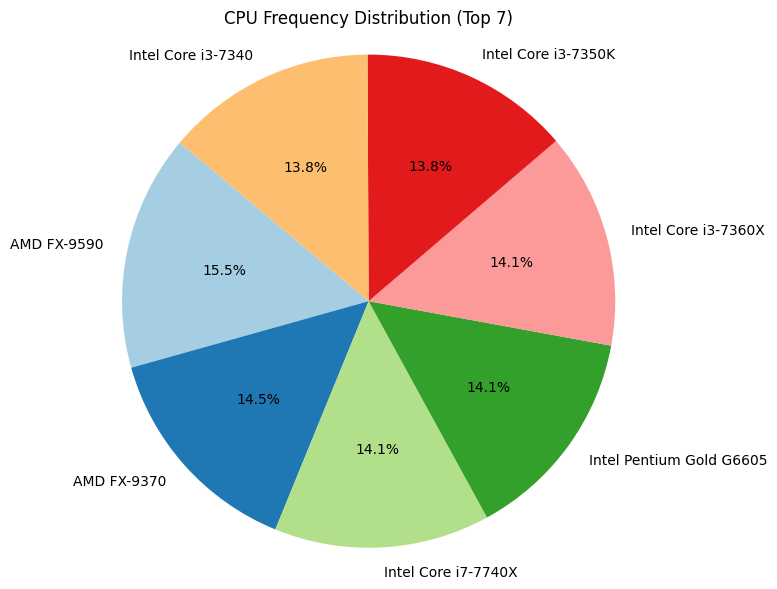

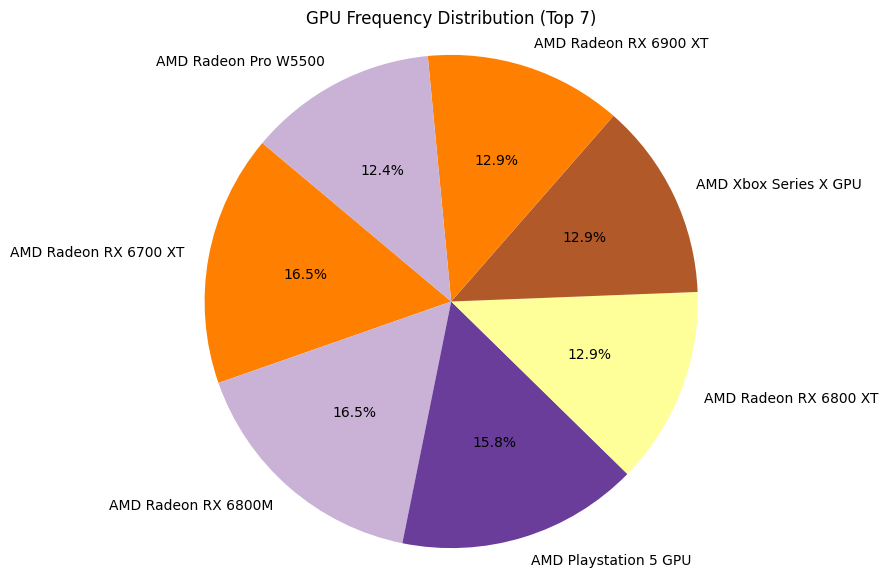

In [23]:

def plot_pie(data, title, colors):
    plt.figure(figsize=(7, 7))
    plt.pie(data["Frequency"], labels=data["Product"], autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_pie(cpu_highest_freq, "CPU Frequency Distribution (Top 7)", plt.cm.Paired.colors[:7])
plot_pie(gpu_highest_freq, "GPU Frequency Distribution (Top 7)", plt.cm.Paired.colors[7:14])